![ML](https://i.pinimg.com/originals/17/b6/8e/17b68ed7a1a1f1e4c97aa35cc313cf75.jpg)

---

### <font color='navy'>  Instructions <font color='black'> 

* Follow a Python Project structure.
* Work with a training and validation dataset to optimize & test your trading strategies using the datasets provided in the introduction section.
* The **ML models** that we'll be using are **Logistic Regression, Support Vector Machine & XGBoost**.
* Define the **independent** and **dependent** variables to train the models, remember that you can add any technical indicator to your dataset.
* Split the `train` datasets into train/test.
* Our dependent variable should be a category that we want to predict, i.e. "Buy" and "Not buy", or "Sell" and "Not sell" for the short models, we can construct it if the next k price is over / under a certain threshold.
* For each model, fine tune all hyperparameters worth moving, then you can easily generate the True / False signals to backtest.
* Be careful when selecting a metric to fine-tune.
* For each dataset train/test pair (1d, 1h, 5m, 1m):

    * Use the buy/sell signals from the predictions.
    * Create all possible combinations of all machine learning models (2^n - 1, 7...).
    * Backtest the strategies while keeping track of the operations and cash/portfolio value time series, remember that we'll be opening long & short positions.
    * Optimize the backtest parameters (TPE, Grid Search, PSO, Genetic Algorithms, ...), stop-loss/take-profit, volume of the trade, maximizing the profit of the strategy with the training dataset, consider the bounds of each variable!
    * Select the optimal strategy and describe it thoroughly (X, y variables used, a brief description of the ML models, results).
    * Now, use the optimal strategy with the test dataset and compare it to a passive strategy.

-------

In [1]:
from machine_learning import Operation, TradingStrategy

In [2]:
strategy = TradingStrategy('5m')

In [3]:
strategy.optimize_and_fit_models()

[I 2024-03-10 20:14:43,688] A new study created in memory with name: no-name-855bd429-5321-4b39-ae2f-c263b423930f
[I 2024-03-10 20:15:00,802] Trial 0 finished with value: 0.29104477611940294 and parameters: {'C': 1146.1469732730793, 'l1_ratio': 0.6984646090319979, 'fit_intercept': False}. Best is trial 0 with value: 0.29104477611940294.
[I 2024-03-10 20:15:18,030] A new study created in memory with name: no-name-64a93c41-9bc1-4b12-9804-11573a7bc2d5
[I 2024-03-10 20:15:35,859] Trial 0 finished with value: 0.29780033840947545 and parameters: {'C': 58057.77292471846, 'l1_ratio': 0.6587620628266909, 'fit_intercept': True}. Best is trial 0 with value: 0.29780033840947545.
[I 2024-03-10 20:15:53,709] A new study created in memory with name: no-name-ec5310bc-caa2-4338-aecb-8b91aadfb255
[I 2024-03-10 20:15:59,197] Trial 0 finished with value: 0.6074756989678324 and parameters: {'booster': 'dart', 'n_estimators': 112, 'learning_rate': 0.04946149058169654, 'reg_alpha': 0.13281390907252055, 'reg_

In [4]:
strategy.run_combinations()

Ejecutando con combinación de indicadores: ['Logistic']
Ejecutando con combinación de indicadores: ['XGBoost']
Ejecutando con combinación de indicadores: ['SVM']
Ejecutando con combinación de indicadores: ['Logistic', 'XGBoost']
Ejecutando con combinación de indicadores: ['Logistic', 'SVM']
Ejecutando con combinación de indicadores: ['XGBoost', 'SVM']
Ejecutando con combinación de indicadores: ['Logistic', 'XGBoost', 'SVM']
Mejor combinación de indicadores: ['Logistic', 'XGBoost'] con un valor de estrategia de: 948635.0499856884


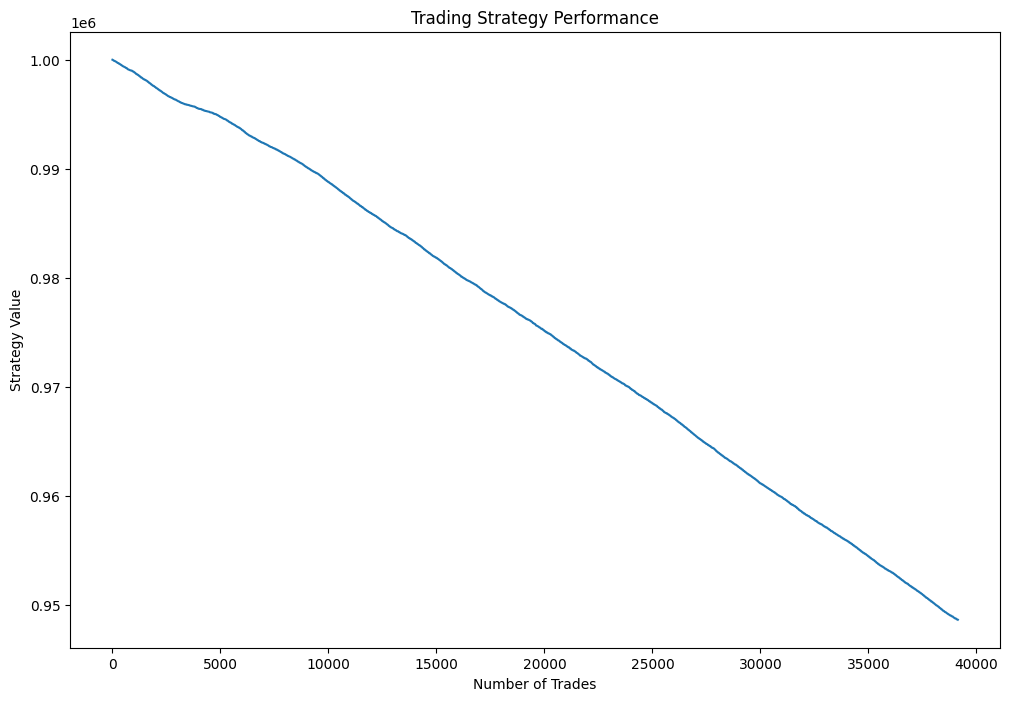

In [5]:
strategy.plot_results(best = True)

In [7]:
strategy.optimize_trade_parameters()

[I 2024-03-10 20:30:01,043] A new study created in memory with name: no-name-cafe1b84-47cd-4e61-9124-35ddd9082811
[I 2024-03-10 20:30:05,764] Trial 0 finished with value: 984590.5149957044 and parameters: {'stop_loss_pct': 0.9246040868111807, 'take_profit_pct': 1.041473648898362, 'n_shares': 3}. Best is trial 0 with value: 984590.5149957044.
[I 2024-03-10 20:30:10,474] Trial 1 finished with value: 599353.3898884658 and parameters: {'stop_loss_pct': 0.9859335829575453, 'take_profit_pct': 1.0423052123404188, 'n_shares': 78}. Best is trial 0 with value: 984590.5149957044.
[I 2024-03-10 20:30:15,239] Trial 2 finished with value: 753448.2399313715 and parameters: {'stop_loss_pct': 0.9576952603310526, 'take_profit_pct': 1.034042527761104, 'n_shares': 48}. Best is trial 0 with value: 984590.5149957044.
[I 2024-03-10 20:30:19,982] Trial 3 finished with value: 532578.9548698904 and parameters: {'stop_loss_pct': 0.943062828170109, 'take_profit_pct': 1.0818685538159278, 'n_shares': 91}. Best is t

[I 2024-03-10 20:32:53,336] Trial 35 finished with value: 912679.5849756976 and parameters: {'stop_loss_pct': 0.9073657040625105, 'take_profit_pct': 1.0394993899840577, 'n_shares': 17}. Best is trial 23 with value: 994863.5049985661.
[I 2024-03-10 20:32:58,156] Trial 36 finished with value: 994863.5049985661 and parameters: {'stop_loss_pct': 0.9450296404384331, 'take_profit_pct': 1.0226235349814938, 'n_shares': 1}. Best is trial 23 with value: 994863.5049985661.
[I 2024-03-10 20:33:02,969] Trial 37 finished with value: 712356.2799199274 and parameters: {'stop_loss_pct': 0.9667254366301125, 'take_profit_pct': 1.0529698929017397, 'n_shares': 56}. Best is trial 23 with value: 994863.5049985661.
[I 2024-03-10 20:33:07,768] Trial 38 finished with value: 835632.1599542362 and parameters: {'stop_loss_pct': 0.920490139953222, 'take_profit_pct': 1.0983547479193678, 'n_shares': 32}. Best is trial 23 with value: 994863.5049985661.
[I 2024-03-10 20:33:12,605] Trial 39 finished with value: 897270.0

[I 2024-03-10 20:35:45,409] Trial 71 finished with value: 979454.0199942754 and parameters: {'stop_loss_pct': 0.9468442565619999, 'take_profit_pct': 1.0271757291006645, 'n_shares': 4}. Best is trial 23 with value: 994863.5049985661.
[I 2024-03-10 20:35:50,170] Trial 72 finished with value: 994863.5049985661 and parameters: {'stop_loss_pct': 0.9446836809895721, 'take_profit_pct': 1.0277757566372148, 'n_shares': 1}. Best is trial 23 with value: 994863.5049985661.
[I 2024-03-10 20:35:54,936] Trial 73 finished with value: 994863.5049985661 and parameters: {'stop_loss_pct': 0.9570389754498906, 'take_profit_pct': 1.0186732690931277, 'n_shares': 1}. Best is trial 23 with value: 994863.5049985661.
[I 2024-03-10 20:35:59,699] Trial 74 finished with value: 948635.0499856884 and parameters: {'stop_loss_pct': 0.9359503517314292, 'take_profit_pct': 1.0370513294979333, 'n_shares': 10}. Best is trial 23 with value: 994863.5049985661.
[I 2024-03-10 20:36:04,465] Trial 75 finished with value: 964044.53

Mejores parámetros encontrados: {'stop_loss_pct': 0.9113122734780916, 'take_profit_pct': 1.017122997747409, 'n_shares': 1}


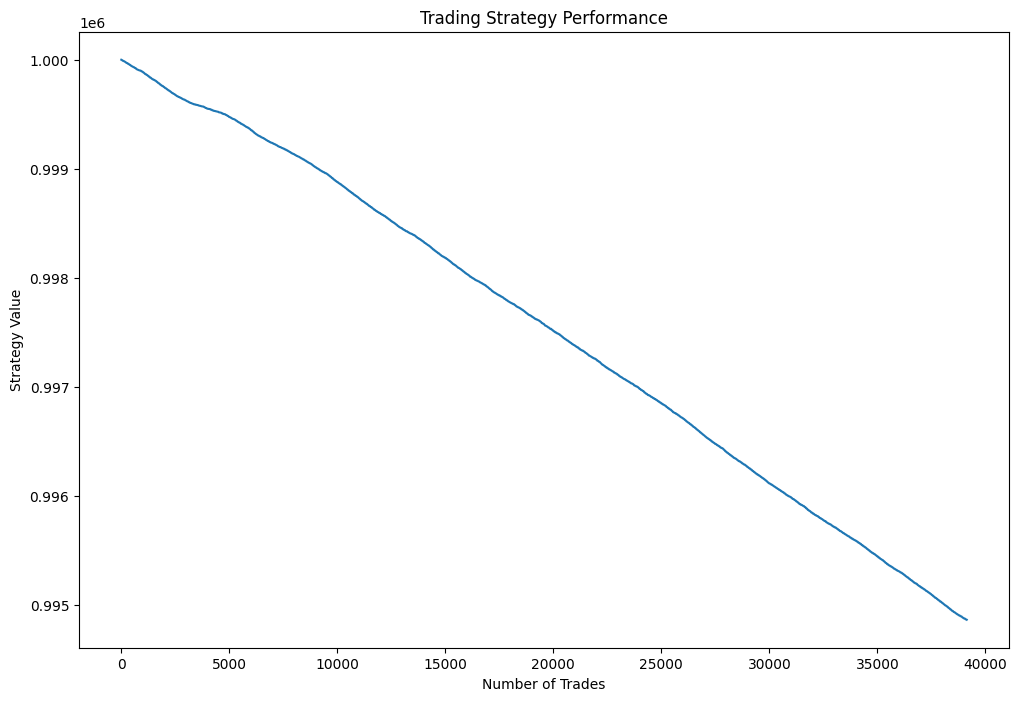

In [8]:
strategy.plot_results(best = True)

### <font color='navy'>  Analysis <font color='black'> 

---